In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base =automap_base()
base.prepare(engine,reflect =True)
# reflect the tables
inspector = inspect(engine)
inspector.get_table_names

<bound method Inspector.get_table_names of <sqlalchemy.engine.reflection.Inspector object at 0x0000026E3CEFD6C8>>

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement 

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

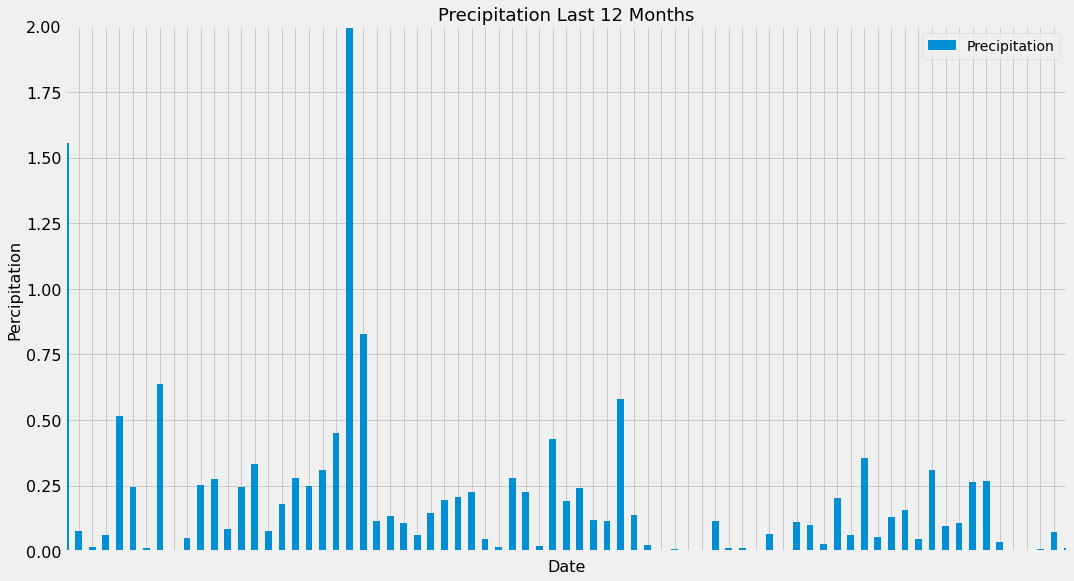

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_data = dt.date(2017,8,23) - dt.timedelta(days = 365)

year_data

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date,func.avg(measurement.prcp)).filter(measurement.date >= year_data).\
            group_by(measurement.date).all()

precip

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

precip_df = pd.DataFrame(precip, columns = ['Date', 'Precipitation'])
precip_df.set_index('Date', inplace =True)
precip_df.head()



# Use Pandas Plotting with Matplotlib to plot the data

p = precip_df.plot(kind = 'bar', figsize = (16,9))
p.tick_params(axis='y', labelsize=16)
p.xaxis.set_major_formatter(plt.NullFormatter())

plt.xlim(1,75)
plt.ylim(0,2)
plt.title("Precipitation Last 12 Months", size=18)
plt.ylabel("Percipitation",size = 16)
plt.xlabel("Date", size = 16)
plt.show
plt.savefig("../Precip.png")

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe() 

,Precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(station).count()

stations

9

In [41]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity=(session.query(measurement.station,func.count(measurement.station)).\
                         group_by(measurement.station).\
                         order_by(func.count(measurement.station).desc()).all())
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = station_activity[0][0]
session.query(func.max(measurement.tobs), func.min(measurement.tobs), func.avg(measurement.tobs)).\
                filter(measurement.station == most_active).all()

[(85.0, 54.0, 71.66378066378067)]

<function matplotlib.pyplot.show(*args, **kw)>

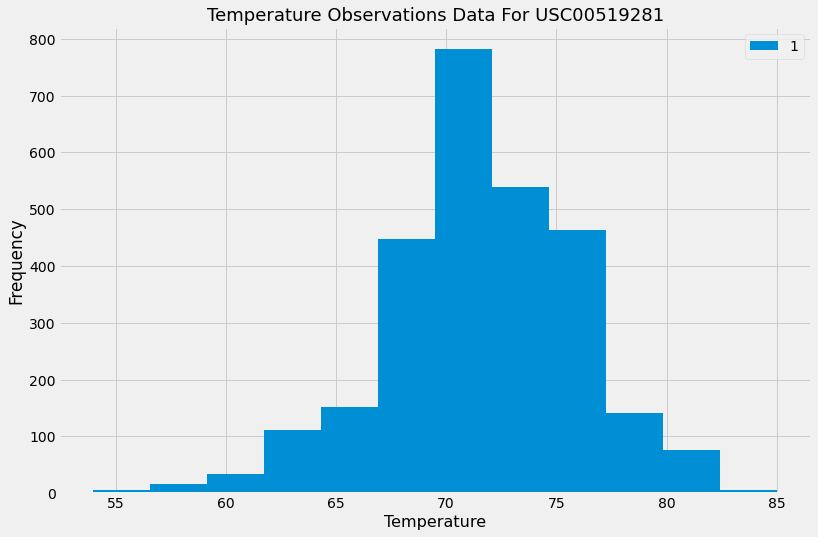

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_id= session.query(measurement.station, measurement.tobs).\
                filter(measurement.station == most_active).\
                filter(measurement.date >= year_data).all()
tobs_df = pd.DataFrame(active_station_id)
tobs_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.title("Temperature Observations Data For " + most_active, fontsize=18)
plt.xlabel("Temperature", fontsize=16)
plt.savefig("../MostactiveTemps.png")
plt.show

# Close session

In [57]:
# Close Session
session.close()